# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | arenapolis
Processing Record 4 of Set 1 | khodzha-maston
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | santa cruz
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | aral
Processing Record 9 of Set 1 | general cabrera
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | zherdevka
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | garden city
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | simanggang
Processing Record 18 of Set 1 | haiku-pauwela
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | puerto baquerizo moreno

Processing Record 38 of Set 4 | pemangkat
Processing Record 39 of Set 4 | beyneu
Processing Record 40 of Set 4 | banyoles
Processing Record 41 of Set 4 | orikhiv
Processing Record 42 of Set 4 | honiara
Processing Record 43 of Set 4 | arno
Processing Record 44 of Set 4 | pulandian
Processing Record 45 of Set 4 | hong kong
Processing Record 46 of Set 4 | conceicao da barra
Processing Record 47 of Set 4 | taco pozo
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | qapqal
City not found. Skipping...
Processing Record 0 of Set 5 | petropavlovsk-kamchatsky
Processing Record 1 of Set 5 | tocopilla
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | alesund
Processing Record 4 of Set 5 | meadow lakes
Processing Record 5 of Set 5 | tefe
Processing Record 6 of Set 5 | ghat
Processing Record 7 of Set 5 | minas de marcona
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | dilling
Processing Record 10 of Set 5 | mora
Processing Record 11 

Processing Record 32 of Set 8 | quellon
Processing Record 33 of Set 8 | navoiy
Processing Record 34 of Set 8 | medenine
Processing Record 35 of Set 8 | sisimiut
Processing Record 36 of Set 8 | puente alto
Processing Record 37 of Set 8 | puerto plata
Processing Record 38 of Set 8 | salinas
Processing Record 39 of Set 8 | port pirie
Processing Record 40 of Set 8 | nalut
Processing Record 41 of Set 8 | zastron
Processing Record 42 of Set 8 | mukachevo
Processing Record 43 of Set 8 | luderitz
Processing Record 44 of Set 8 | pathein
Processing Record 45 of Set 8 | jammu
Processing Record 46 of Set 8 | sao vicente
Processing Record 47 of Set 8 | cidade velha
Processing Record 48 of Set 8 | dunlap
Processing Record 49 of Set 8 | kupang
Processing Record 0 of Set 9 | sola
Processing Record 1 of Set 9 | saint-pierre
Processing Record 2 of Set 9 | tres lagoas
Processing Record 3 of Set 9 | ma'an
Processing Record 4 of Set 9 | lubuklinggau
Processing Record 5 of Set 9 | yemetsk
Processing Record 

Processing Record 24 of Set 12 | new norfolk
Processing Record 25 of Set 12 | vilyuysk
Processing Record 26 of Set 12 | alaghsas
Processing Record 27 of Set 12 | karlskrona
Processing Record 28 of Set 12 | kaliua
Processing Record 29 of Set 12 | yamba
Processing Record 30 of Set 12 | kuqa
Processing Record 31 of Set 12 | al bahah
Processing Record 32 of Set 12 | general pico
Processing Record 33 of Set 12 | alice springs
Processing Record 34 of Set 12 | kuala terengganu
Processing Record 35 of Set 12 | lobujya
Processing Record 36 of Set 12 | midvagur
Processing Record 37 of Set 12 | fisterra
Processing Record 38 of Set 12 | taltal
Processing Record 39 of Set 12 | clarion
Processing Record 40 of Set 12 | pahrump
Processing Record 41 of Set 12 | sao gabriel da cachoeira
Processing Record 42 of Set 12 | kruisfontein
Processing Record 43 of Set 12 | ozernyy
Processing Record 44 of Set 12 | bamboo flat
Processing Record 45 of Set 12 | knyaze-volkonskoye
Processing Record 46 of Set 12 | man

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,277.83,68,45,5.38,TF,1707415481
1,bredasdorp,-34.5322,20.0403,292.97,64,88,5.25,ZA,1707415481
2,arenapolis,-14.4503,-56.8461,300.73,72,89,3.60,BR,1707415481
3,khodzha-maston,38.7446,68.6270,274.83,50,100,5.26,TJ,1707415481
4,hermanus,-34.4187,19.2345,293.04,73,81,4.26,ZA,1707415362


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,277.83,68,45,5.38,TF,1707415481
1,bredasdorp,-34.5322,20.0403,292.97,64,88,5.25,ZA,1707415481
2,arenapolis,-14.4503,-56.8461,300.73,72,89,3.60,BR,1707415481
3,khodzha-maston,38.7446,68.6270,274.83,50,100,5.26,TJ,1707415481
4,hermanus,-34.4187,19.2345,293.04,73,81,4.26,ZA,1707415362


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

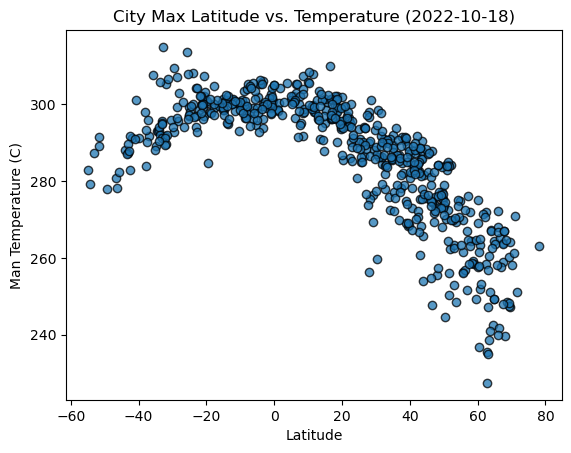

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Man Temperature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

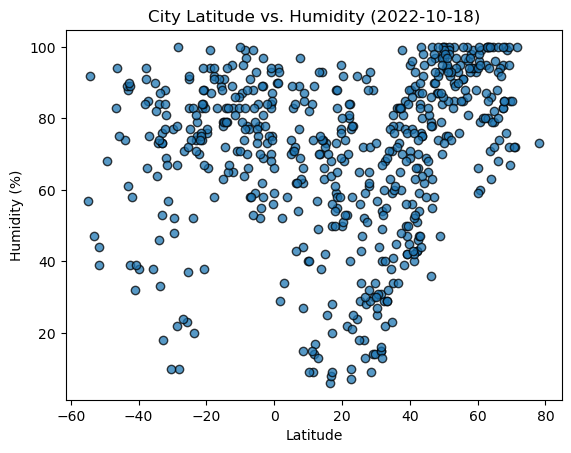

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

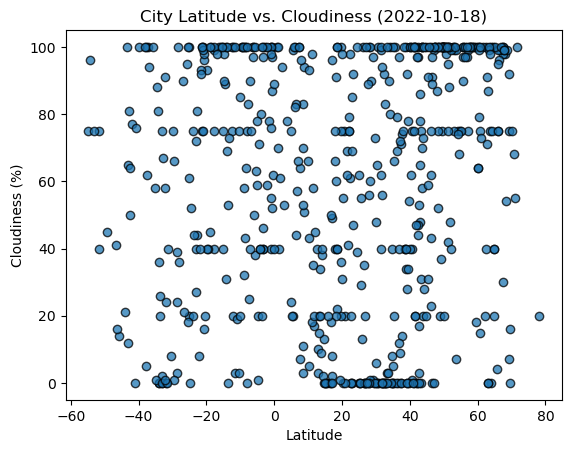

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

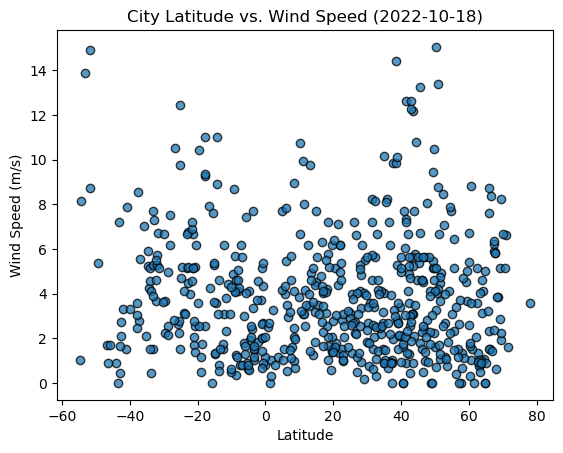

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,khodzha-maston,38.7446,68.6270,274.83,50,100,5.26,TJ,1707415481
7,aral,40.5156,81.2636,272.98,56,1,1.63,CN,1707415481
10,stanley,54.8680,-1.6985,274.92,95,75,7.72,GB,1707415482
11,zherdevka,51.8486,41.4606,262.19,92,48,4.94,RU,1707415482
12,bilibino,68.0546,166.4372,239.55,100,98,0.63,RU,1707415482


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,277.83,68,45,5.38,TF,1707415481
1,bredasdorp,-34.5322,20.0403,292.97,64,88,5.25,ZA,1707415481
2,arenapolis,-14.4503,-56.8461,300.73,72,89,3.60,BR,1707415481
4,hermanus,-34.4187,19.2345,293.04,73,81,4.26,ZA,1707415362
5,santa cruz,-17.8000,-63.1667,304.85,58,75,9.26,BO,1707415210


###  Temperature vs. Latitude Linear Regression Plot

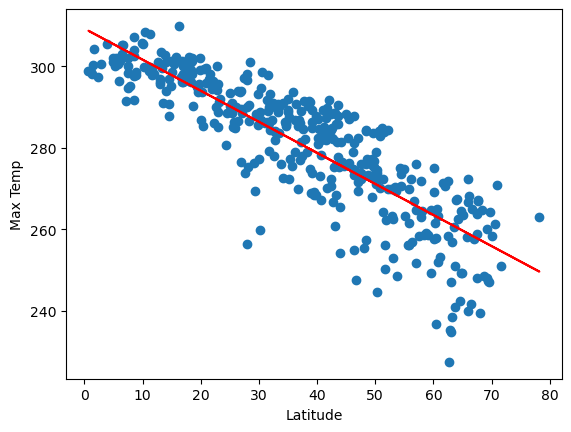

The r-value is: 0.7267533065381842


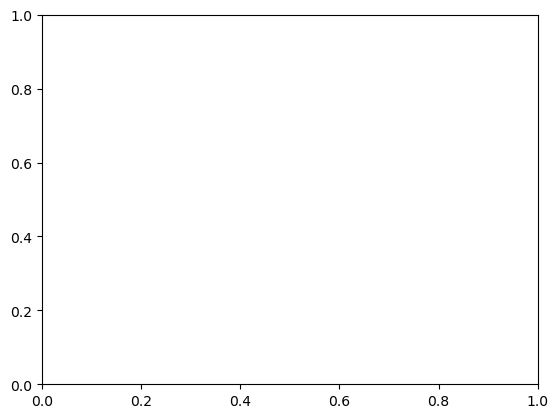

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

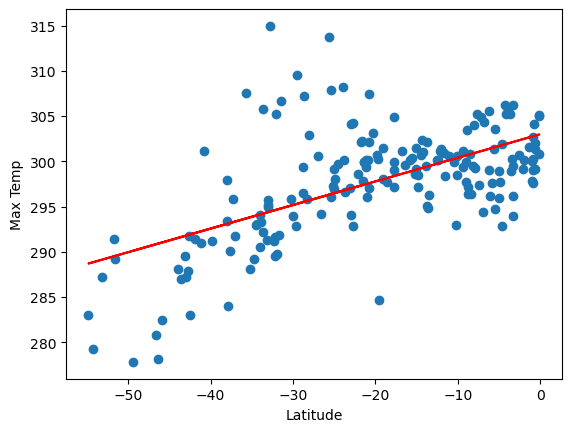

The r-value is: 0.3417488805493975


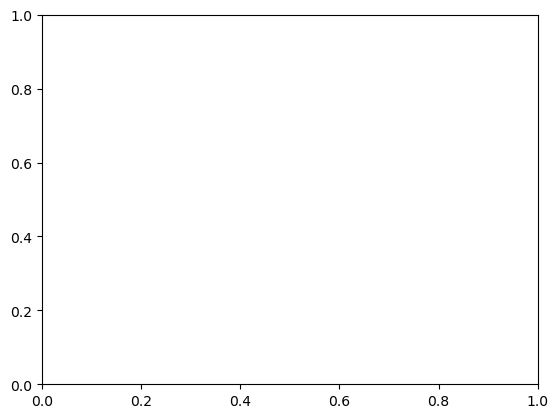

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** There is strong linear relationship between Latitude and Max Temperature for cities with positive latitude, but not so much for cities with negative latitude.

### Humidity vs. Latitude Linear Regression Plot

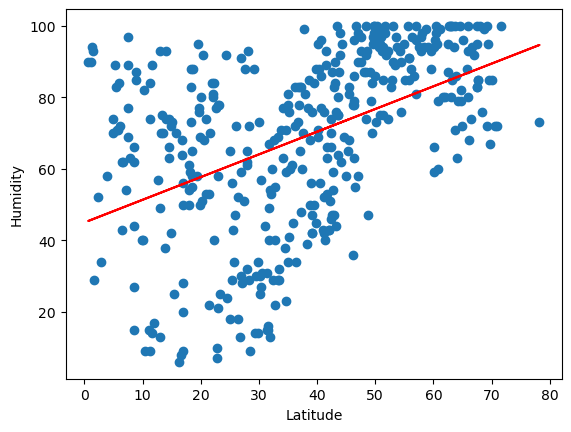

The r-value is: 0.22140633645082408


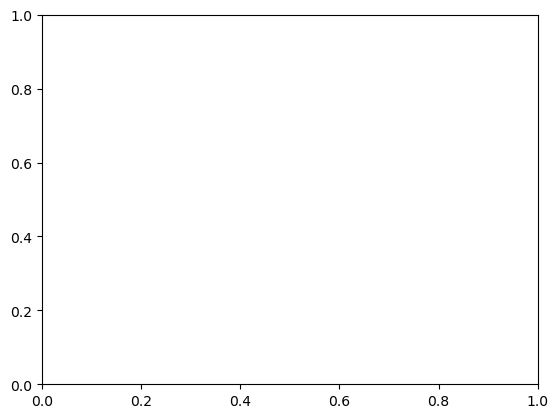

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

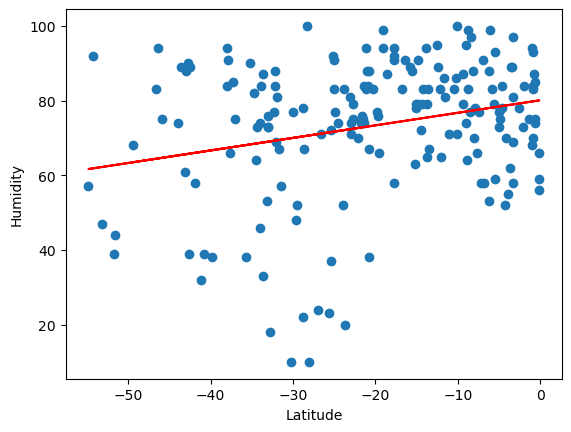

The r-value is: 0.06496597788832234


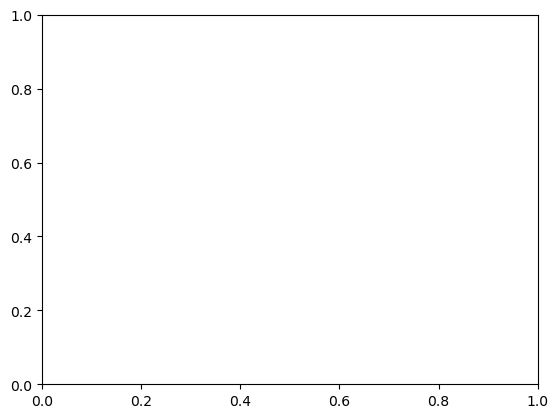

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** There is a decent amount of linear correlation between Latitude and Humidity for cities with negative latitude, but very litte linear relation for cities with positive latitude.

### Cloudiness vs. Latitude Linear Regression Plot

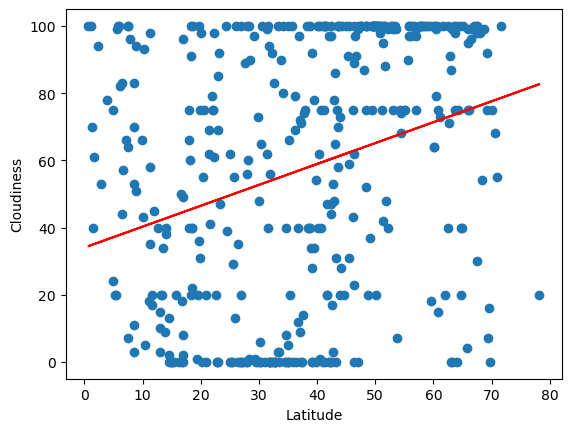

The r-value is: 0.08738579211239476


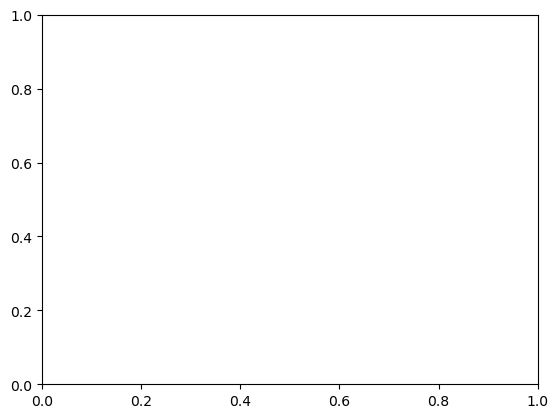

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

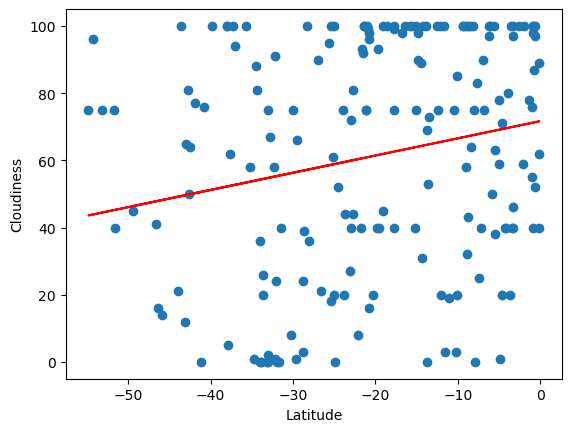

The r-value is: 0.04344843010938501


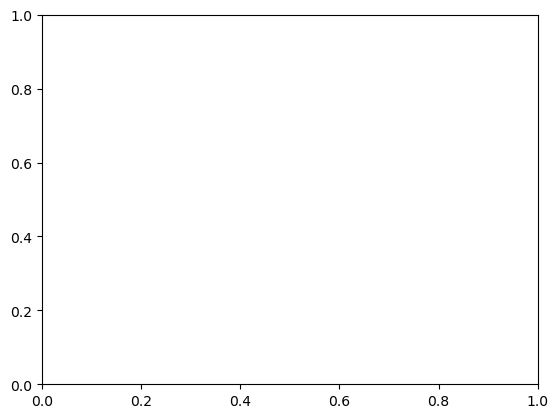

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** There is next to no linear relationship between Latitude and Cloudiness for cities, regardless of their latitude value.

### Wind Speed vs. Latitude Linear Regression Plot

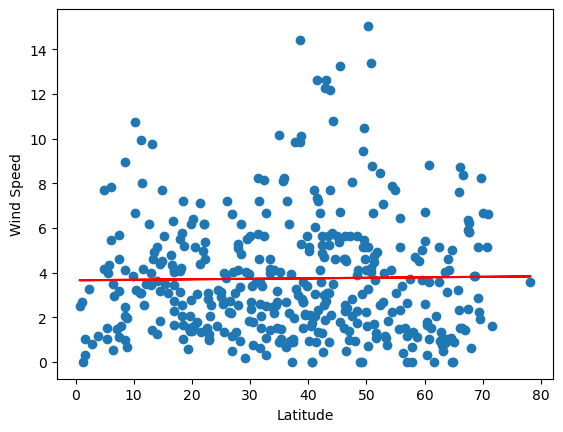

The r-value is: 0.00022613964704016123


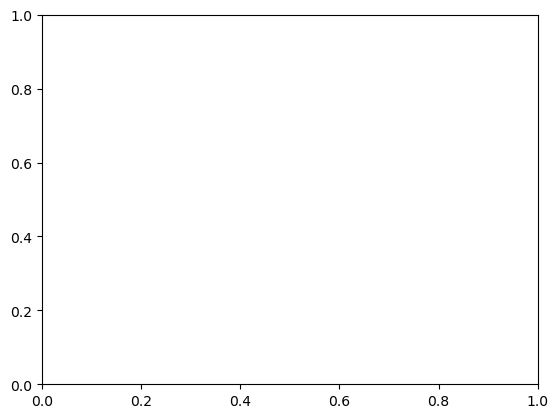

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

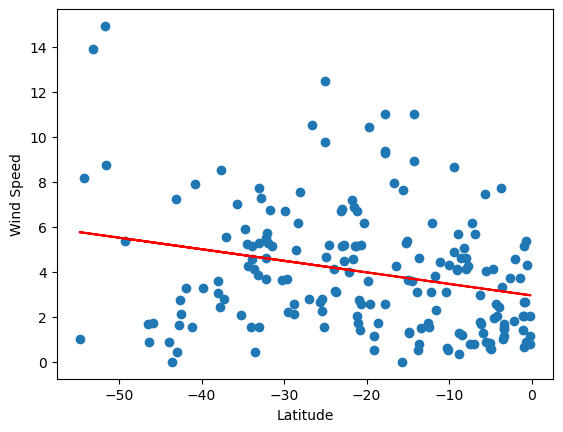

The r-value is: 0.06603111955343147


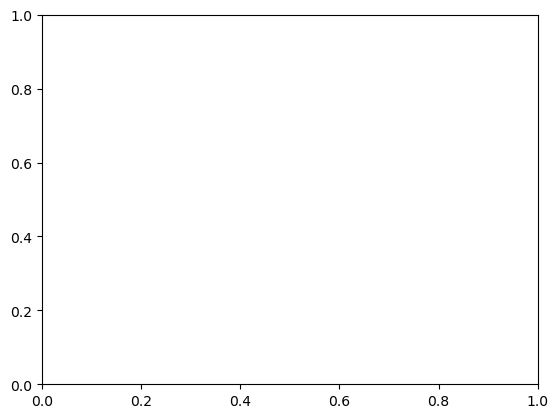

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.annotate(line_eq,(20,5), fontsize = 15, color="red")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** There is next to no linear relationship between Latitude and Wind Speed for cities, regardless of their latitude value.